# Importing necessary libraries

In [59]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.python.keras import regularizers
from keras.layers import Activation, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import StandardScaler

In [60]:
# read data from csv file
data = pd.read_csv("Student data.csv")

In [61]:
# view first 3 rows
data.head(3)

,Student Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Independent variables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,First Term Gpa' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Second Term Gpa' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [62]:
# set name of the columns of the dataset
data = data[23:]
columns = ["first_term_gpa","second_term_gpa","language","funding","school","fasttrack","coop","residency","gender","prev_education","age_group",
                "high_school_average_mark","math_score","english_grade","first_year_persistence"]
data.columns = columns

In [63]:
#dataset after renaming columns
data.head(3)

,first_term_gpa,second_term_gpa,language,funding,school,fasttrack,coop,residency,gender,prev_education,age_group,high_school_average_mark,math_score,english_grade,first_year_persistence
23,0,0,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,59,16,7,1.0
24,2.5,2,3,4.0,6.0,1.0,2.0,2.0,2.0,1,3,?,?,7,1.0
25,4.25,3.923077,1,1.0,6.0,2.0,1.0,1.0,1.0,2,3,92,41,9,1.0


In [64]:
# check data for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 23 to 1459
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   first_term_gpa            1437 non-null   object 
 1   second_term_gpa           1437 non-null   object 
 2   language                  1437 non-null   object 
 3   funding                   1437 non-null   float64
 4   school                    1437 non-null   float64
 5   fasttrack                 1437 non-null   float64
 6   coop                      1437 non-null   float64
 7   residency                 1437 non-null   float64
 8   gender                    1437 non-null   float64
 9   prev_education            1437 non-null   object 
 10  age_group                 1437 non-null   object 
 11  high_school_average_mark  1437 non-null   object 
 12  math_score                1437 non-null   object 
 13  english_grade             1437 non-null   object 
 14  first_y

In [65]:
# view last 3 rows
data.tail(3)

,first_term_gpa,second_term_gpa,language,funding,school,fasttrack,coop,residency,gender,prev_education,age_group,high_school_average_mark,math_score,english_grade,first_year_persistence
1457,2.020833,2.45,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,78,18,9,1.0
1458,4.021739,4.357143,?,4.0,6.0,2.0,1.0,2.0,1.0,1,2,?,46,8,1.0
1459,2.133333,3.205882,1,2.0,6.0,2.0,2.0,1.0,1.0,1,1,81,27,9,1.0


### Here we can see that some columns have "?" so we have to impute those values. Imputing those values with median.

In [66]:
# replace "?" with np.nan
data.replace('?', np.nan, inplace=True)

# separate columsn into float and int type
float_columns = ["first_term_gpa","second_term_gpa","high_school_average_mark","math_score"]
int_columns = ["language","funding","school","fasttrack","coop","residency","gender","prev_education","age_group","english_grade","first_year_persistence"]

# change column type object to int and float
for column in data.columns:
    data[column].fillna(data[column].median(),inplace=True)
    if column in int_columns:
        data[column] = data[column].astype(int)
    if column in float_columns:
        data[column] = data[column].astype(float)
    

In [67]:
data.head()

,first_term_gpa,second_term_gpa,language,funding,school,fasttrack,coop,residency,gender,prev_education,age_group,high_school_average_mark,math_score,english_grade,first_year_persistence
23,0.000000,0.000000,1,2,6,2,1,1,2,1,1,59.0,16.0,7,1
24,2.500000,2.000000,3,4,6,1,2,2,2,1,3,77.5,32.0,7,1
25,4.250000,3.923077,1,1,6,2,1,1,1,2,3,92.0,41.0,9,1
26,3.020833,2.321429,3,4,6,1,2,2,2,2,3,77.5,32.0,8,1
27,4.275000,4.326923,1,2,6,1,1,1,1,2,3,97.0,32.0,9,1


In [68]:
# get data with first_year_persistence = 0
data[data["first_year_persistence"] == 0].head()

,first_term_gpa,second_term_gpa,language,funding,school,fasttrack,coop,residency,gender,prev_education,age_group,high_school_average_mark,math_score,english_grade,first_year_persistence
29,2.210526,1.375000,1,2,6,2,1,1,2,1,1,68.0,20.0,7,0
44,3.086957,2.656250,1,2,6,2,2,1,2,1,1,80.0,28.0,9,0
56,2.125000,1.409091,3,2,6,2,2,1,2,1,2,81.0,31.0,9,0
69,1.105263,0.000000,1,2,6,2,2,1,2,2,2,82.0,22.0,7,0
73,1.780000,3.027778,1,2,6,2,1,1,2,1,1,87.0,28.0,9,0


In [69]:
# printing the shape of dataset
data.shape

(1437, 15)

In [70]:
# Displaying statistical summary such as mean,median,mode,standard deviation and percentile of each column
data.describe()

,first_term_gpa,second_term_gpa,language,funding,school,fasttrack,coop,residency,gender,prev_education,age_group,high_school_average_mark,math_score,english_grade,first_year_persistence
count,1437.000000,1437.000000,1437.000000,1437.000000,1437.0,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000
mean,2.849108,2.843291,1.840640,2.926931,6.0,1.741823,1.695198,1.406402,1.774530,1.274182,2.632568,77.332289,32.378566,8.029228,0.791928
std,1.168451,1.065903,0.986153,1.257658,0.0,0.437784,0.460484,0.491332,0.419699,0.567193,1.419619,8.388590,8.823875,1.689055,0.406070
min,0.000000,0.000000,1.000000,1.000000,6.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,17.000000,6.000000,1.000000,0.000000
25%,2.250000,2.388889,1.000000,2.000000,6.0,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,77.500000,27.000000,7.000000,1.000000
50%,3.102632,3.027778,1.000000,2.000000,6.0,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,77.500000,32.000000,8.000000,1.000000
75%,3.738095,3.590909,3.000000,4.000000,6.0,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,77.500000,38.000000,9.000000,1.000000
max,4.500000,4.500000,3.000000,9.000000,6.0,2.000000,2.000000,2.000000,3.000000,2.000000,8.000000,108.000000,50.000000,10.000000,1.000000


# Visualizations

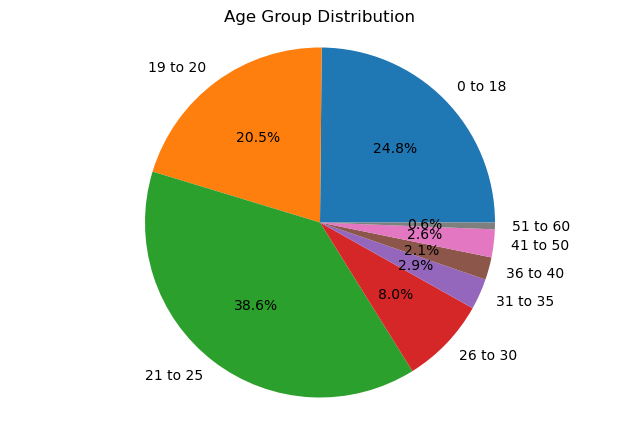

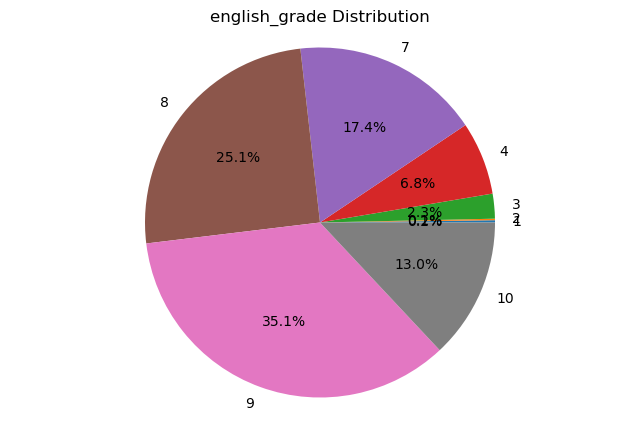

In [71]:
#plot a pie chart of age_group
labels = ["0 to 18", "19 to 20", "21 to 25", "26 to 30","31 to 35","36 to 40", "41 to 50", "51 to 60"]

age_group_counts = data['age_group'].value_counts().sort_index()
plt.figure(figsize=(8, 5))

plt.pie(age_group_counts.values, labels=labels, autopct='%1.1f%%')
plt.axis('equal') 
plt.title('Age Group Distribution')
english_grade = data['english_grade'].value_counts().sort_index()

# plot a pie chart of english_grade
plt.figure(figsize=(8,5))
plt.pie(english_grade.values, labels=english_grade.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('english_grade Distribution')
plt.show()


plt.show()

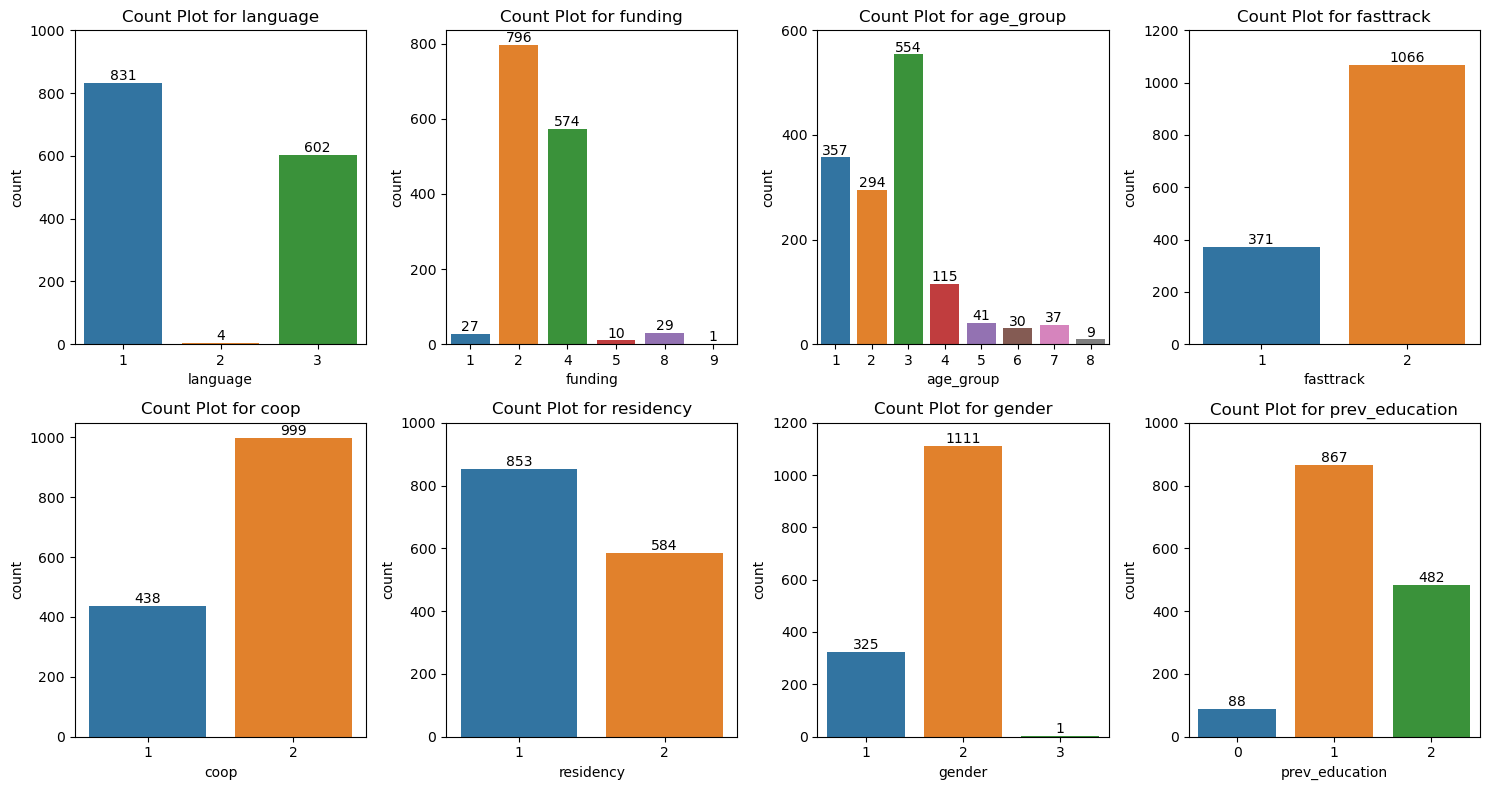

In [72]:
# plot frequency distribution plot for numerical columns
count_plot_columns = ["language", "funding","age_group", "fasttrack", "coop", "residency", "gender", "prev_education"]
count_plot_df = data[count_plot_columns]

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(count_plot_df.columns):
    ax = sns.countplot(data=count_plot_df, x=col, ax=axes[i])
    axes[i].set_title(f'Count Plot for {col}')
    max_count = count_plot_df[col].value_counts().max()
    ax.set_yticks(np.arange(0, max_count + 200, 200))
    # annotate text for each bar in the graph
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'top', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')
plt.tight_layout()
plt.show()

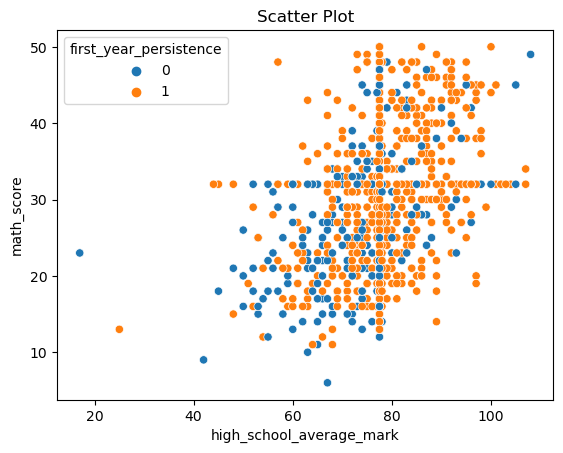

In [73]:
# scatterplot of high_school_average_mark and math_score
sns.scatterplot(data=data, x='high_school_average_mark', y='math_score',hue="first_year_persistence")

plt.xlabel('high_school_average_mark')
plt.ylabel('math_score')
plt.title('Scatter Plot')

plt.show()

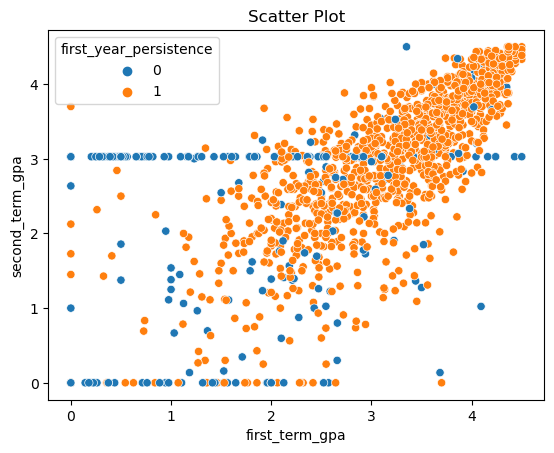

In [74]:
# scatterplot of first_term_gpa and second_term_gpa
sns.scatterplot(data=data, x='first_term_gpa', y='second_term_gpa',hue="first_year_persistence")
plt.xlabel('first_term_gpa')
plt.ylabel('second_term_gpa')
plt.title('Scatter Plot')

plt.show()

# Outlier Handling

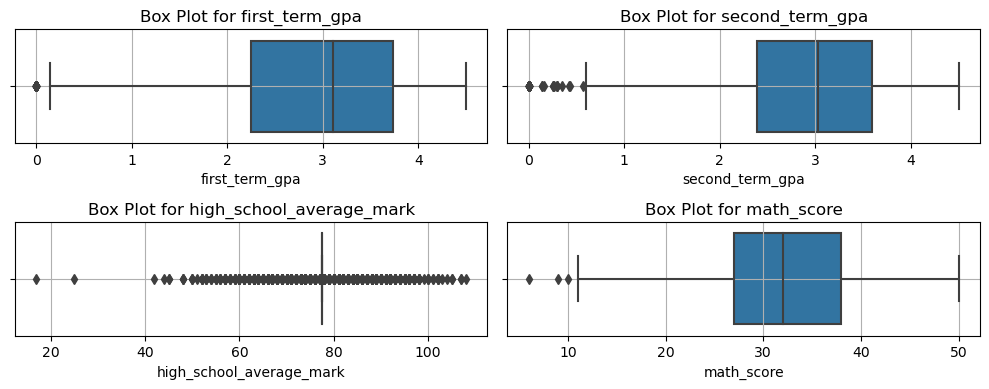

In [75]:
# plotting boxplot for numerical visualizing outliers 
float_columns = ["first_term_gpa","second_term_gpa","high_school_average_mark","math_score"]
num_columns = len(data[float_columns].columns)
num_rows = (num_columns + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 2*num_rows))  

for i, column in enumerate(data[float_columns].columns):
    if column in float_columns:
        # print(i,col)
        row = i // 2
        col = i % 2
        # print(data[column].head())
        sns.boxplot(x=data[column], ax=axes[row][col])
        axes[row][col].set_title(f'Box Plot for {column}')
        axes[row][col].set_xlabel(column)
        axes[row][col].grid(True)


plt.tight_layout()
plt.show()

skipping high_school_average_mark from outlier handling as it has too many outliers

In [76]:
# using Interquartile range Floor and Cap as threshold for outlier
filter_columns = ["first_term_gpa","second_term_gpa","math_score"]
def remove_outliers(df):
    for col in df.columns:
        if col in filter_columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            # print(lower,upper)
            df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

data = remove_outliers(data)

In [77]:
data.shape

(1270, 15)

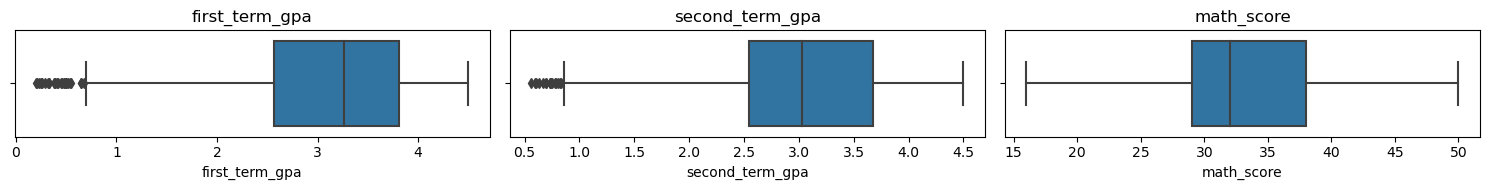

In [78]:
# box plots after outlier removal
fig, axes = plt.subplots(1, 3, figsize=(15, 2))

# Plot box plots for each column side by side
for i, col in enumerate(data[filter_columns].columns):
    plt.subplots_adjust(wspace=1)
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(col)

# Show the plot
plt.tight_layout()
plt.show()

# Model Training and testing

In [79]:
# Setting first_year_persistence as target and other columns as features
X = data.drop(columns="first_year_persistence")
y = data["first_year_persistence"]

# splitting dataset into 80:20 for training and testingh
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier

In [80]:
# initializing Random Forest Classifier as refernce classifier and baseline model
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [81]:
# predicting target labels for train dataset
y_pred = rfc.predict(X_train)

# calculating accuracy score
accuracy = round(accuracy_score(y_train, y_pred),2)
print(accuracy)

# print classification report for viewing precision, recall amd f1 score
print(classification_report(y_train, y_pred)) 

0.87
              precision    recall  f1-score   support

           0       1.00      0.09      0.16       146
           1       0.87      1.00      0.93       870

    accuracy                           0.87      1016
   macro avg       0.93      0.54      0.55      1016
weighted avg       0.89      0.87      0.82      1016



In [82]:
# predicting target labels for test dataset
y_pred = rfc.predict(X_test)

# calculating accuracy score
accuracy = round(accuracy_score(y_test, y_pred),2)
print(accuracy)

# print classification report for viewing precision, recall amd f1 score
print(classification_report(y_test, y_pred)) 

0.85
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        39
           1       0.85      1.00      0.92       215

    accuracy                           0.85       254
   macro avg       0.92      0.51      0.48       254
weighted avg       0.87      0.85      0.79       254



The accuracy was observed to be 87% for train set and 85% for test set and using RFC. The model performed pretty well in identifying samples of class 1 (persistence) whereas struggles with identifying samples of class 0 (dropout), as seen by the results of recall and f1 score. This was because of the class imbalance.

# Neural Network

In [83]:
# initializing standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation='relu',kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01),input_shape=(X_train.shape[1],)),Dropout(0.1),
    tf.keras.layers.Dense(10, activation='relu',kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01),input_shape=(X_train.shape[1],)),Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=2, callbacks=[early_stopping])

Epoch 1/50
26/26 - 1s - loss: 0.4820 - accuracy: 0.8461 - val_loss: 0.3546 - val_accuracy: 0.8725 - 1s/epoch - 52ms/step
Epoch 2/50
26/26 - 0s - loss: 0.3895 - accuracy: 0.8522 - val_loss: 0.3529 - val_accuracy: 0.8725 - 84ms/epoch - 3ms/step
Epoch 3/50
26/26 - 0s - loss: 0.3877 - accuracy: 0.8522 - val_loss: 0.3535 - val_accuracy: 0.8725 - 85ms/epoch - 3ms/step
Epoch 4/50
26/26 - 0s - loss: 0.3786 - accuracy: 0.8522 - val_loss: 0.3464 - val_accuracy: 0.8725 - 78ms/epoch - 3ms/step
Epoch 5/50
26/26 - 0s - loss: 0.3747 - accuracy: 0.8522 - val_loss: 0.3479 - val_accuracy: 0.8725 - 77ms/epoch - 3ms/step
Epoch 6/50
26/26 - 0s - loss: 0.3809 - accuracy: 0.8522 - val_loss: 0.3434 - val_accuracy: 0.8725 - 74ms/epoch - 3ms/step
Epoch 7/50
26/26 - 0s - loss: 0.3690 - accuracy: 0.8522 - val_loss: 0.3417 - val_accuracy: 0.8725 - 81ms/epoch - 3ms/step
Epoch 8/50
26/26 - 0s - loss: 0.3691 - accuracy: 0.8522 - val_loss: 0.3358 - val_accuracy: 0.8725 - 76ms/epoch - 3ms/step
Epoch 9/50
26/26 - 0s - l

32/32 [==============================] - 0s 1ms/step
0.8474409448818898


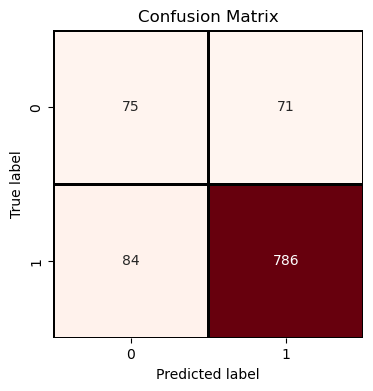

              precision    recall  f1-score   support

           0       0.47      0.51      0.49       146
           1       0.92      0.90      0.91       870

    accuracy                           0.85      1016
   macro avg       0.69      0.71      0.70      1016
weighted avg       0.85      0.85      0.85      1016



In [85]:
# predicting target labels for train dataset
y_pred_prob = model.predict(X_train)
y_pred = (y_pred_prob > 0.7).astype(int)

accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

# printing confusion matrix for visualizing true positive, true negative, false positive and false negative
conf_matrix_values= confusion_matrix(y_train, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_values, annot=True, fmt='d', cmap='Reds', cbar=False,linecolor="black",linewidths=1)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
print(classification_report(y_train, y_pred)) 

8/8 [==============================] - 0s 1ms/step
0.81


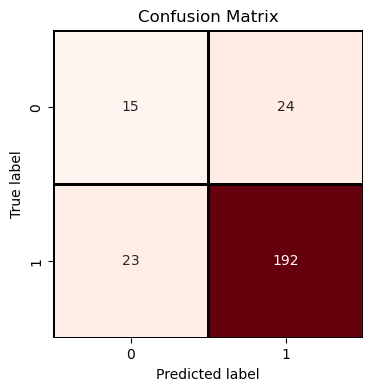

              precision    recall  f1-score   support

           0       0.39      0.38      0.39        39
           1       0.89      0.89      0.89       215

    accuracy                           0.81       254
   macro avg       0.64      0.64      0.64       254
weighted avg       0.81      0.81      0.81       254



In [86]:
# predicting target labels for test dataset
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.7).astype(int)

accuracy = round(accuracy_score(y_test, y_pred),2)
print(accuracy)

# printing confusion matrix for visualizing true positive, true negative, false positive and false negative
conf_matrix_values= confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_values, annot=True, fmt='d', cmap='Reds', cbar=False,linecolor="black",linewidths=1)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print(classification_report(y_test, y_pred)) 

The accuracy was observed to be 84% for train set and 81% for test set and using Neural network which is slightly overfitting. The model performed pretty well in identifying samples of class 1 (persistence) whereas struggles with identifying samples of class 0 (dropout), as seen by the results of recall and f1 score. This was because of the class imbalance.

In [58]:
# saving the model using pickle
model_pkl_file = "dropout_prediction_model.pkl"  
scaler_plk = "scaler.pkl"
with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)
with open(scaler_plk, 'wb') as file:  
    pickle.dump(scaler, file)

C:\Users\shres\AppData\Roaming\Python\Python311\site-packages\keras\src\regularizers.py:426: UserWarning: The `keras.regularizers.serialize()` API should only be used for objects of type `keras.regularizers.Regularizer`. Found an instance of type <class 'tensorflow.python.keras.regularizers.L2'>, which may lead to improper serialization.
  warnings.warn(


the model and scaler was saved using pickle for further use from the REST api